In [1]:
author_list = ['Charles Dickens','Jane Austen','Sir Arthur Conan Doyle','George Eliot','Jules Verne']

In [2]:
dataset_file  = "dataset.csv"

In [3]:
seed_number = 122

In [4]:
import pandas as pd

data = pd.read_csv("dataset.csv", usecols = ['author','text'])
#data.head()

In [5]:
data.shape

(25000, 2)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
# Train, Test, Validation Spit ratios 60%, 20%, 20% 

X_train, X_val, y_train, y_val = train_test_split(data["text"], data["author"], test_size=0.2, random_state=2000)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=seed_number) # 0.25 x 0.8 = 0.2

In [9]:
# MultinomialNB
# Ref : https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

clf = Pipeline([('tfidf',TfidfVectorizer()),('clf1',MultinomialNB(alpha=0.1))])



In [10]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf1', MultinomialNB(alpha=0.1))])

### Testing with "test" split

e:\Miniconda3\envs\tf2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


                        precision    recall  f1-score   support

       Charles Dickens       0.91      0.81      0.86      1006
          George Eliot       0.89      0.88      0.88       978
           Jane Austen       0.88      0.95      0.91      1026
           Jules Verne       0.92      0.95      0.93       994
Sir Arthur Conan Doyle       0.88      0.88      0.88       996

              accuracy                           0.89      5000
             macro avg       0.89      0.89      0.89      5000
          weighted avg       0.89      0.89      0.89      5000

accuracy_score: 0.8942


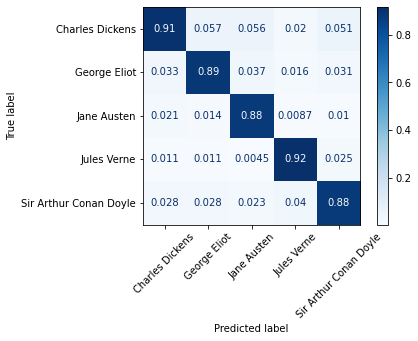

In [11]:
y_pred = clf.predict(X_test)
plot_confusion_matrix(clf, X_test, y_test, normalize='pred', cmap='Blues', xticks_rotation=45) 
print(classification_report(y_test, y_pred))
print( "accuracy_score: " + str(accuracy_score(y_test, y_pred)))

### Testing with "validation" split

e:\Miniconda3\envs\tf2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


                        precision    recall  f1-score   support

       Charles Dickens       0.91      0.81      0.86       985
          George Eliot       0.90      0.87      0.89       986
           Jane Austen       0.88      0.96      0.92      1016
           Jules Verne       0.91      0.95      0.93      1043
Sir Arthur Conan Doyle       0.89      0.90      0.90       970

              accuracy                           0.90      5000
             macro avg       0.90      0.90      0.90      5000
          weighted avg       0.90      0.90      0.90      5000

accuracy_score: 0.8982


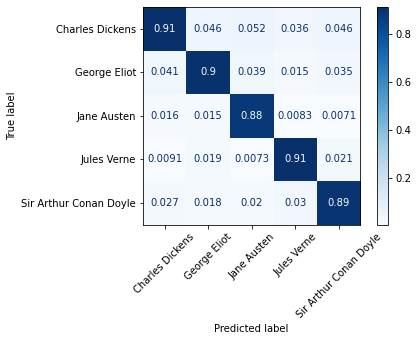

In [12]:
y_pred = clf.predict(X_val)
plot_confusion_matrix(clf, X_val, y_val, normalize='pred', cmap='Blues', xticks_rotation=45) 
print(classification_report(y_val, y_pred))
print( "accuracy_score: " + str(accuracy_score(y_val, y_pred)))

### Accuracy averaged over 20 random states

In [13]:
import random

In [14]:
iteration_number = 20

In [15]:
random_states = range(1,21)

In [16]:
accuracy_test = []
accuracy_validation = []

In [17]:
for seed_number in random_states:
    # Train, Test, Validation Spit ratios 60%, 20%, 20% 

    X_train, X_val, y_train, y_val = train_test_split(data["text"], data["author"], test_size=0.2, random_state=2000)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=seed_number) # 0.25 x 0.8 = 0.2    
    
    
    clf.fit(X_train, y_train)    
    
    y_pred = clf.predict(X_test)    
    accuracy_test.append (accuracy_score(y_test, y_pred))
    
    y_pred = clf.predict(X_val)    
    accuracy_validation.append (accuracy_score(y_val, y_pred))
    

In [18]:
accuracy_test

[0.8888,
 0.8926,
 0.893,
 0.894,
 0.8898,
 0.895,
 0.891,
 0.8904,
 0.897,
 0.8924,
 0.8952,
 0.8904,
 0.8928,
 0.8922,
 0.89,
 0.8962,
 0.902,
 0.8942,
 0.8948,
 0.897]

In [19]:
final_test_accuracy = 0
for accuracy in accuracy_test:
    final_test_accuracy += accuracy
final_test_accuracy = final_test_accuracy/iteration_number

In [20]:
print( "averaged test accuracy score: " + str(final_test_accuracy))

averaged test accuracy score: 0.89344


In [21]:
accuracy_validation

[0.8998,
 0.9004,
 0.9004,
 0.8996,
 0.9016,
 0.892,
 0.9006,
 0.8998,
 0.9,
 0.8966,
 0.899,
 0.8964,
 0.9034,
 0.8958,
 0.9024,
 0.8988,
 0.902,
 0.9006,
 0.8976,
 0.898]

In [22]:
final_validation_accuracy = 0
for accuracy in accuracy_validation:
    final_validation_accuracy += accuracy
final_validation_accuracy = final_validation_accuracy/iteration_number

In [23]:
print( "averaged validation accuracy score: " + str(final_validation_accuracy))

averaged validation accuracy score: 0.89924
